In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd
import geodatasets
from shapely.geometry import Point, Polygon

In [3]:
df = pd.read_csv(r'C:\Users\Gebruiker\Desktop\Data Analysis\Portfolio Projects\04. covid_19.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.rename(columns={'Province/State':'Province_State', 'Country/Region': 'Country_Region'}, inplace=True)
df

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [10]:
print(df.shape)
print(df.info())

(49068, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  14664 non-null  object 
 1   Country_Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None


In [11]:
df.isna().sum()

Province_State    34404
Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [13]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [88]:
df2 = df.groupby('Date')[['Deaths', 'Confirmed', 'Recovered', 'Active']].max()
df2

,Deaths,Confirmed,Recovered,Active
Date,,,,
2020-01-22,17,444,28,399
2020-01-23,17,444,28,399
2020-01-24,24,549,31,494
2020-01-25,40,761,32,689
2020-01-26,52,1058,42,964
...,...,...,...,...
2020-07-23,144430,4038816,1620313,2661117
2020-07-24,145560,4112531,1693214,2705347
2020-07-25,146465,4178970,1785359,2753091


In [23]:
df2.describe()

,Deaths,Confirmed,Recovered,Active
count,188.000000,1.880000e+02,1.880000e+02,1.880000e+02
mean,59639.867021,1.207955e+06,3.561068e+05,8.429331e+05
std,54004.683338,1.223908e+06,4.636142e+05,8.069737e+05
min,17.000000,4.440000e+02,2.800000e+01,3.990000e+02
25%,3002.500000,6.773400e+04,4.617475e+04,4.310925e+04
50%,53692.000000,9.243685e+05,1.098000e+05,7.709510e+05
75%,113851.250000,2.006444e+06,5.352010e+05,1.357391e+06
max,148011.000000,4.290259e+06,1.846641e+06,2.816444e+06


In [90]:
df.groupby(['Province_State', 'Country_Region'])[['Deaths', 'Confirmed', 'Recovered', 'Active']].max()

,,Deaths,Confirmed,Recovered,Active
Province_State,Country_Region,,,,
Alberta,Canada,186,10390,0,10204
Anguilla,United Kingdom,0,3,3,3
Anhui,China,6,991,985,758
Aruba,Netherlands,3,119,102,69
Australian Capital Territory,Australia,3,113,109,76
...,...,...,...,...,...
Western Australia,Australia,9,659,647,358
Xinjiang,China,3,311,73,235
Yukon,Canada,0,14,0,14


# Geo Data Visualisation

In [36]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))
gdf

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,geometry
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,POINT (67.70995 33.93911)
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,POINT (20.16830 41.15330)
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,POINT (1.65960 28.03390)
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,POINT (1.52180 42.50630)
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,POINT (6.61310 0.18640)
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,POINT (48.51639 15.55273)
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,POINT (43.33330 -11.64550)
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,POINT (71.27610 38.86100)


In [37]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<Axes: >

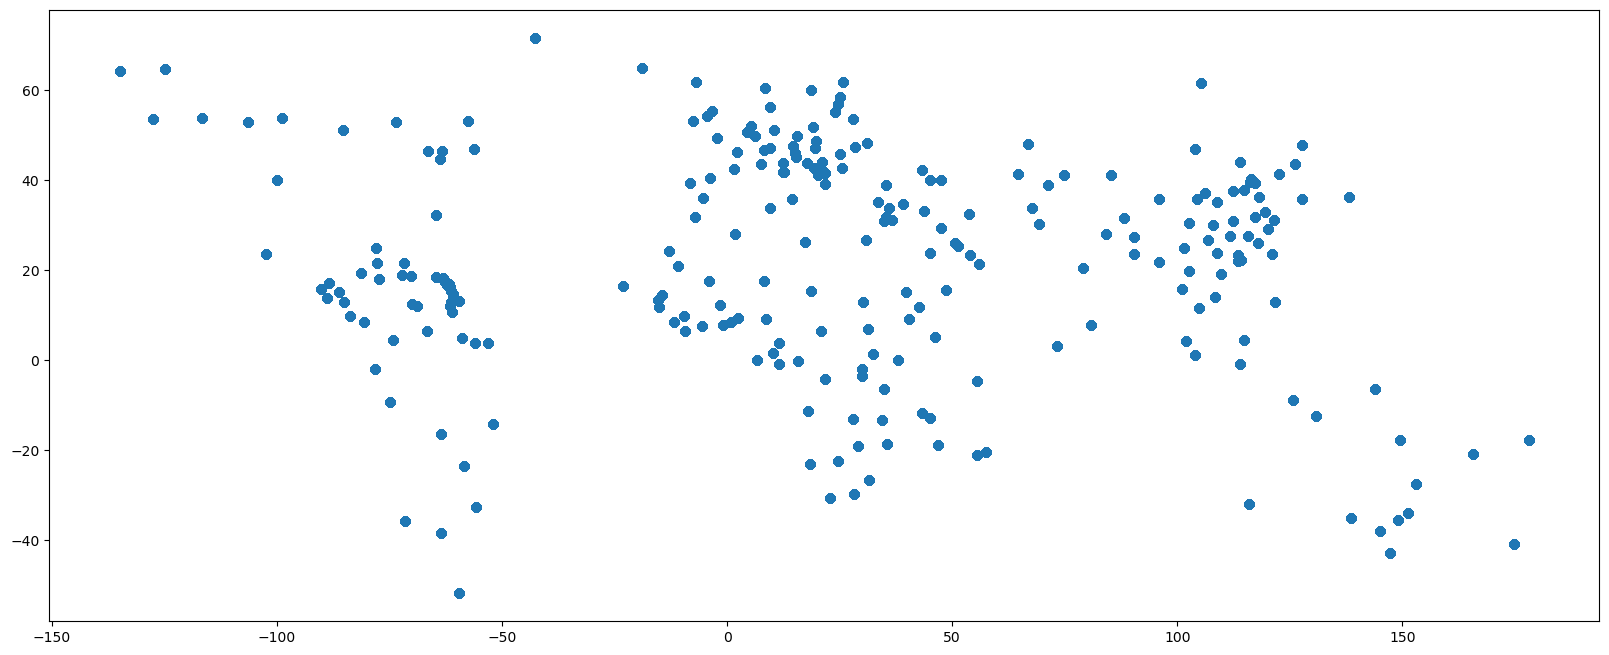

In [46]:
gdf.plot(figsize=(20, 10))

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3236\3135393660.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

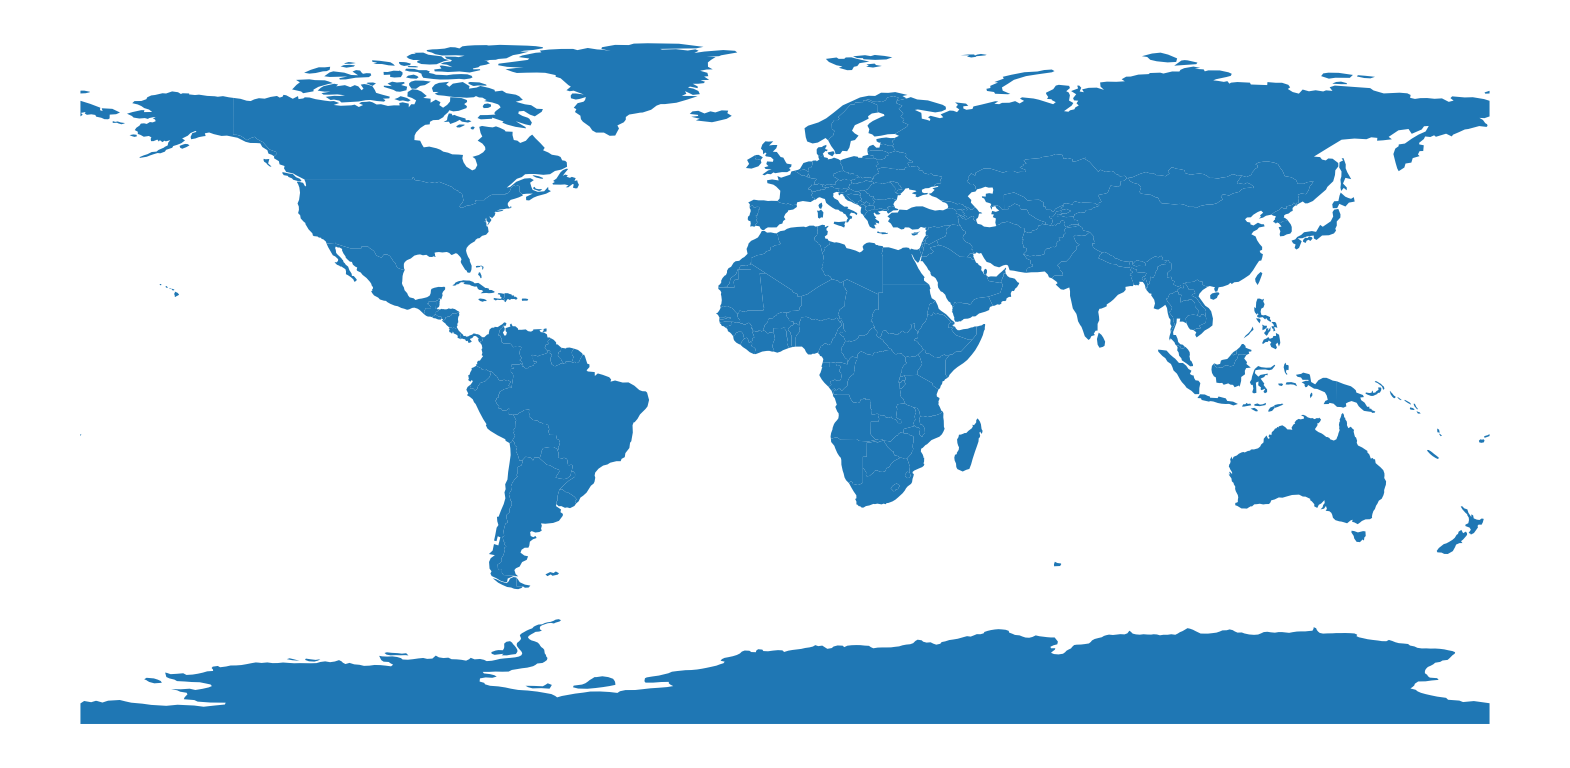

In [45]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20, 10))
ax.axis('off')

<Axes: >

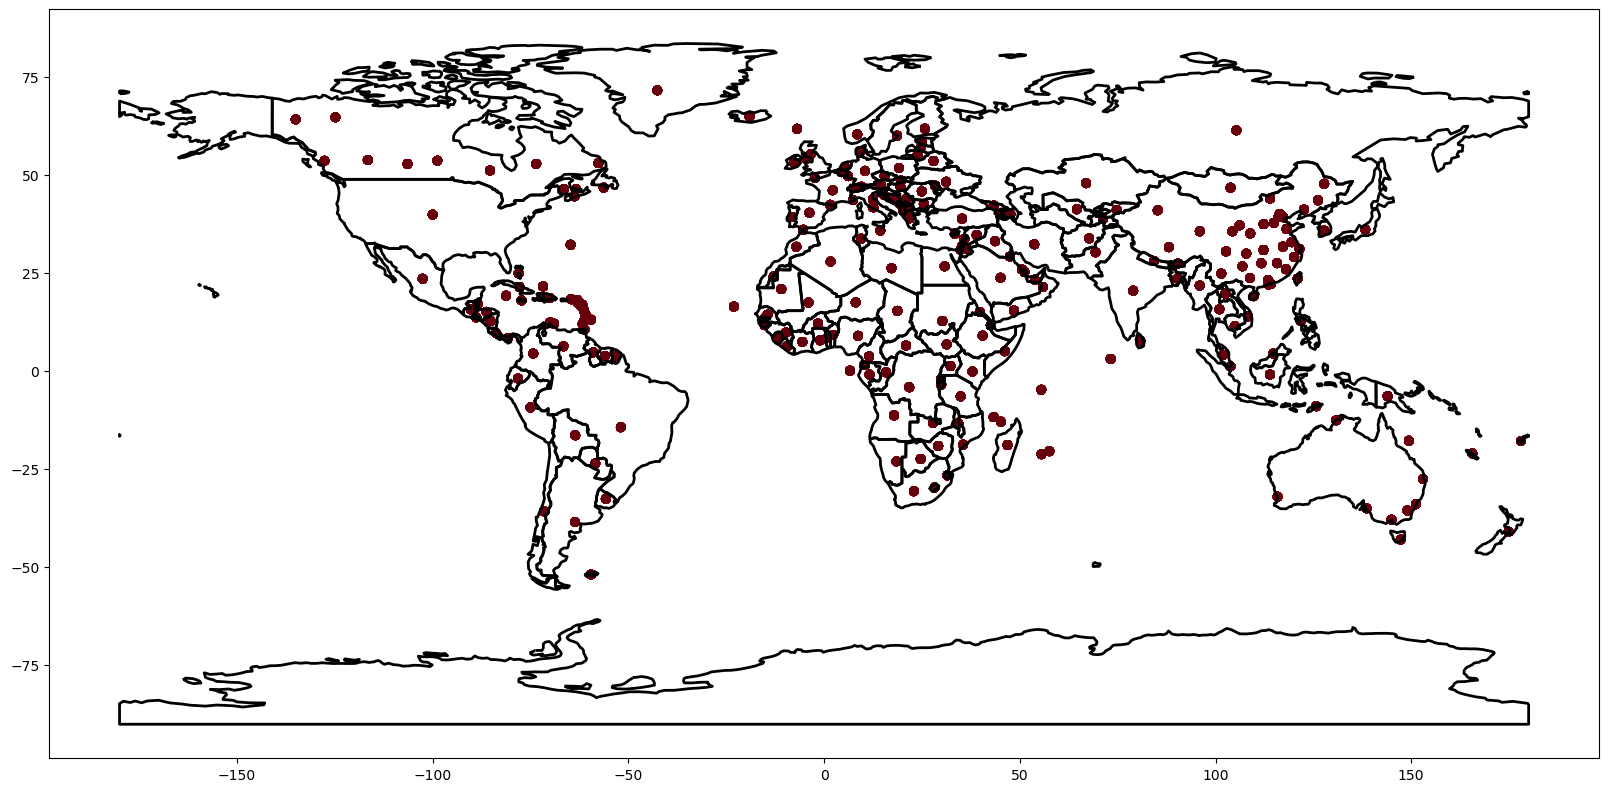

In [49]:
fig,ax = plt.subplots(figsize=(20, 10))
gdf.plot(cmap='Reds', ax=ax)
world.geometry.boundary.plot(color=None, edgecolor='k', linewidth=2, ax=ax)

In [51]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

# Geo Data per Continent

In [54]:
oceania = world[world['continent'] == 'Oceania']
oceania.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
89,299882.0,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
134,287800.0,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."
135,669823.0,Oceania,Solomon Is.,SLB,1589,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."


<Axes: >

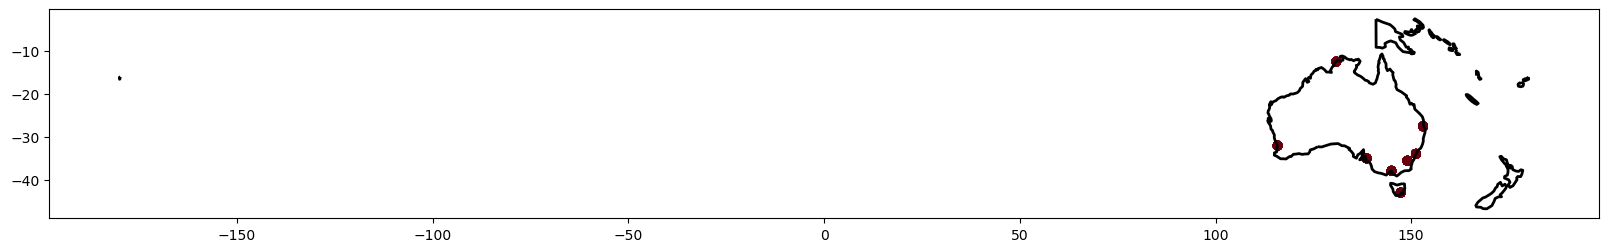

In [67]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'Australia'].plot(cmap='Reds' ,ax=ax)
oceania.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [56]:
africa = world[world['continent'] == 'Africa']
africa.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


<Axes: >

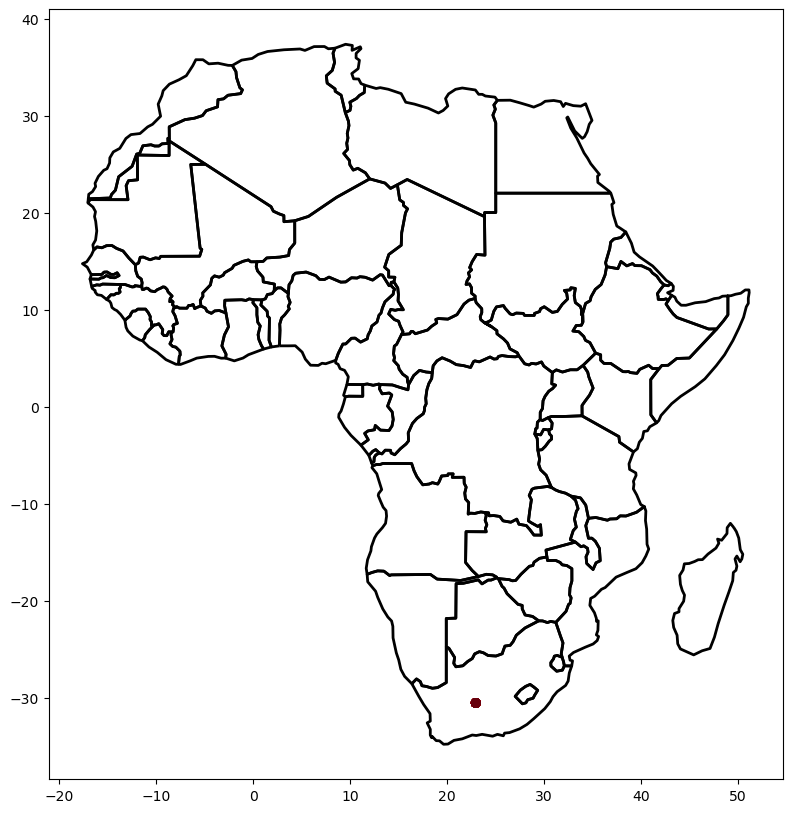

In [79]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'South Africa'].plot(cmap='Reds' ,ax=ax)
africa.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [62]:
north_america = world[world['continent'] == 'North America']
north_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."


<Axes: >

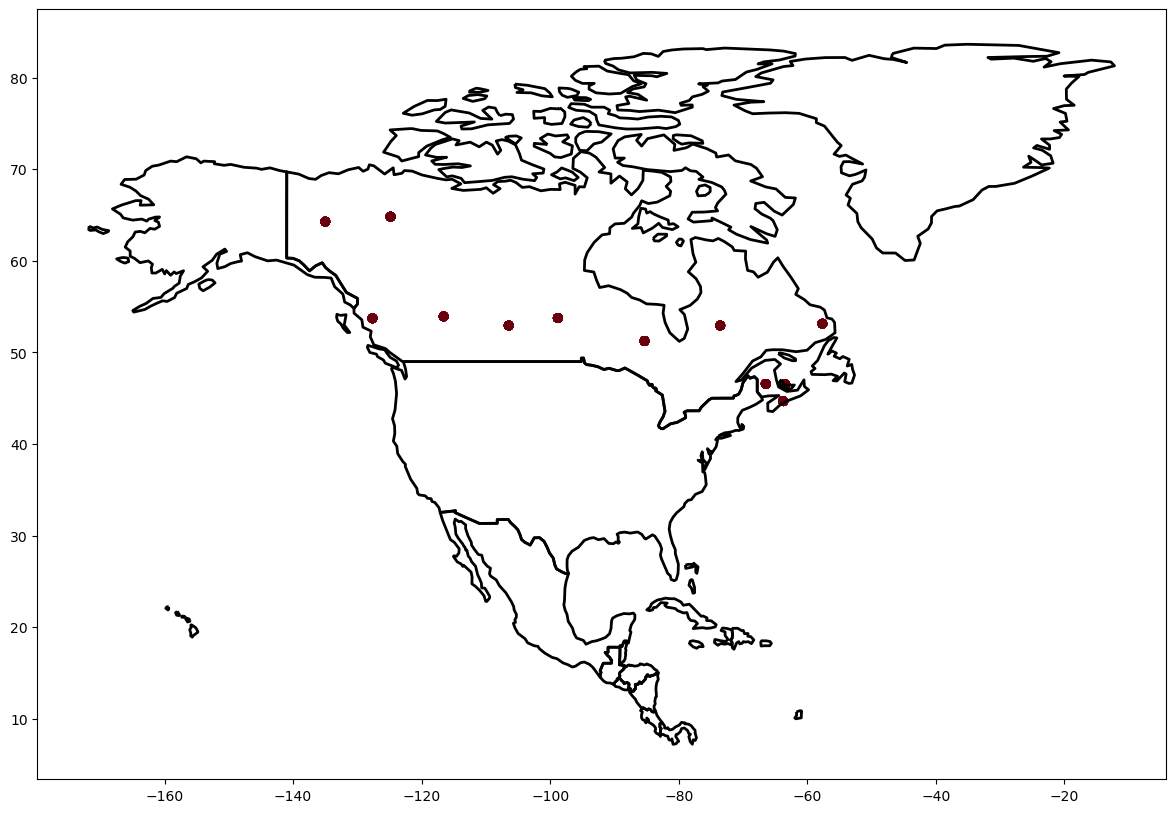

In [74]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'Canada'].plot(cmap='Reds' ,ax=ax)
north_america.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [58]:
asia = world[world['continent'] == 'Asia']
asia.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1293119.0,Asia,Timor-Leste,TLS,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."


<Axes: >

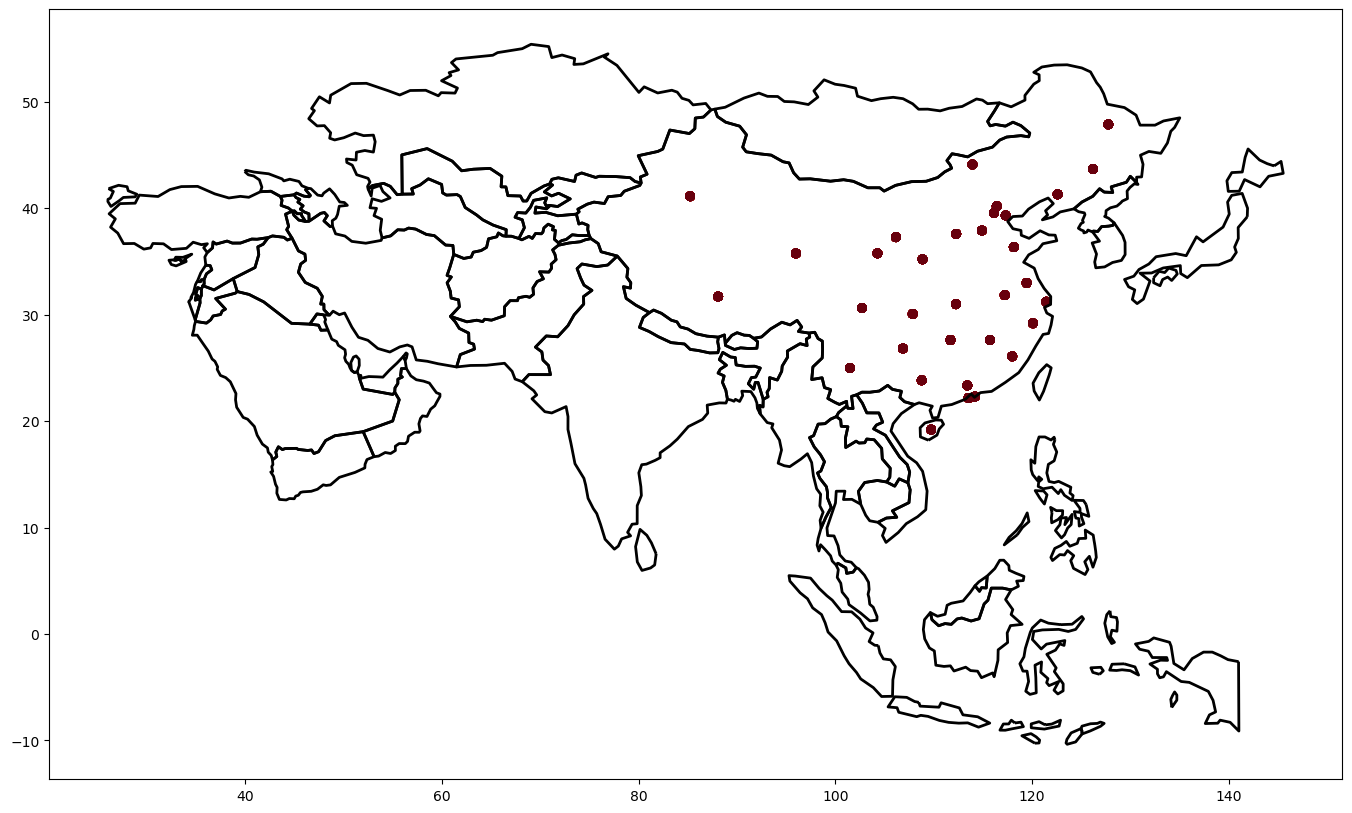

In [73]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'China'].plot(cmap='Reds' ,ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [59]:
south_america = world[world['continent'] == 'South America']
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


<Axes: >

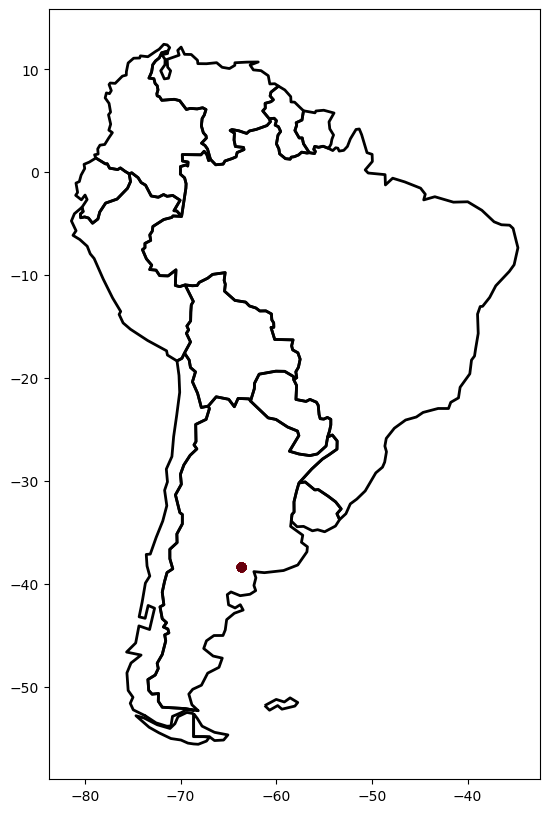

In [76]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'Argentina'].plot(cmap='Reds' ,ax=ax)
south_america.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [60]:
europe = world[world['continent'] == 'Europe']
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


<Axes: >

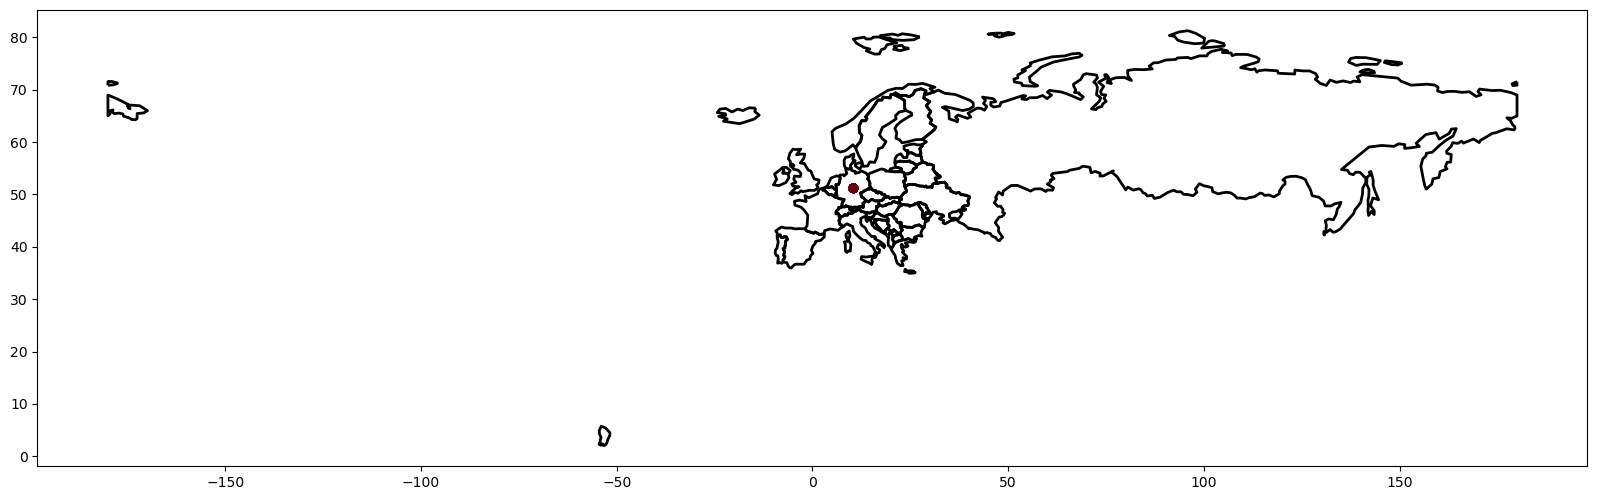

In [77]:
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'Germany'].plot(cmap='Reds' ,ax=ax)
europe.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)